# Encryption and Decryption Tests

The goal of this notebook is to ensure that the encryption and decryption functions operate correctly, and can accurately deal with images.

In [1]:
from cryptosystem import *
from utils import *
# Show the figures / plots inside the notebook
%matplotlib inline

In [2]:
# Make sure that all of the values between 0 and 255 can be encrypted and decrypted correctly:
flag = True
for i in range(256):
    converted_i = np.uint64(i)
    if converted_i != decrypt(encrypt(converted_i)): 
        flag = False
        print(i)
        break
print(flag)

True


In [3]:
# Make sure that a simple numpy array can be encrypted and decrypted correctly:
image = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]).astype(np.uint64)
encryptedImage = encryptImage(image)
decryptedImage = decryptImage(encryptedImage)

image == decryptedImage

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Now, let's test on an actual image

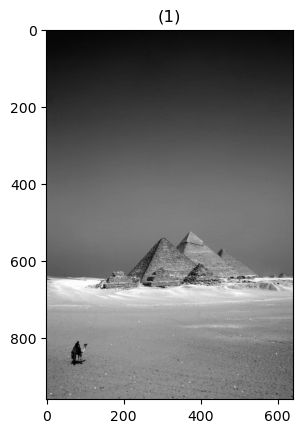

array([[  6,   6,   6, ...,   7,   8,   8],
       [  6,   6,   6, ...,   8,   8,   8],
       [  6,   6,   6, ...,   8,   9,   8],
       ...,
       [ 87, 103, 119, ...,  97,  88,  87],
       [100, 114, 127, ..., 102,  94,  94],
       [101, 120, 127, ..., 110,  99,  96]], dtype=uint64)

In [4]:
# Read and prepare the test image
pyramids = io.imread("pyramids.jpeg")
grayscale_pyramids = (rgb2gray(pyramids) * 255).astype(np.uint64)
show_images([grayscale_pyramids])
grayscale_pyramids

In [5]:
# Encrypt the image
encrypted_pyramids = encryptImage(grayscale_pyramids)

In [6]:
# Decrypt the image
decrypted_pyramids = decryptImage(encrypted_pyramids)

In [7]:
# Make sure that the original image and the decrypted image differ in no values
np.sum(np.not_equal(grayscale_pyramids, decrypted_pyramids))

0

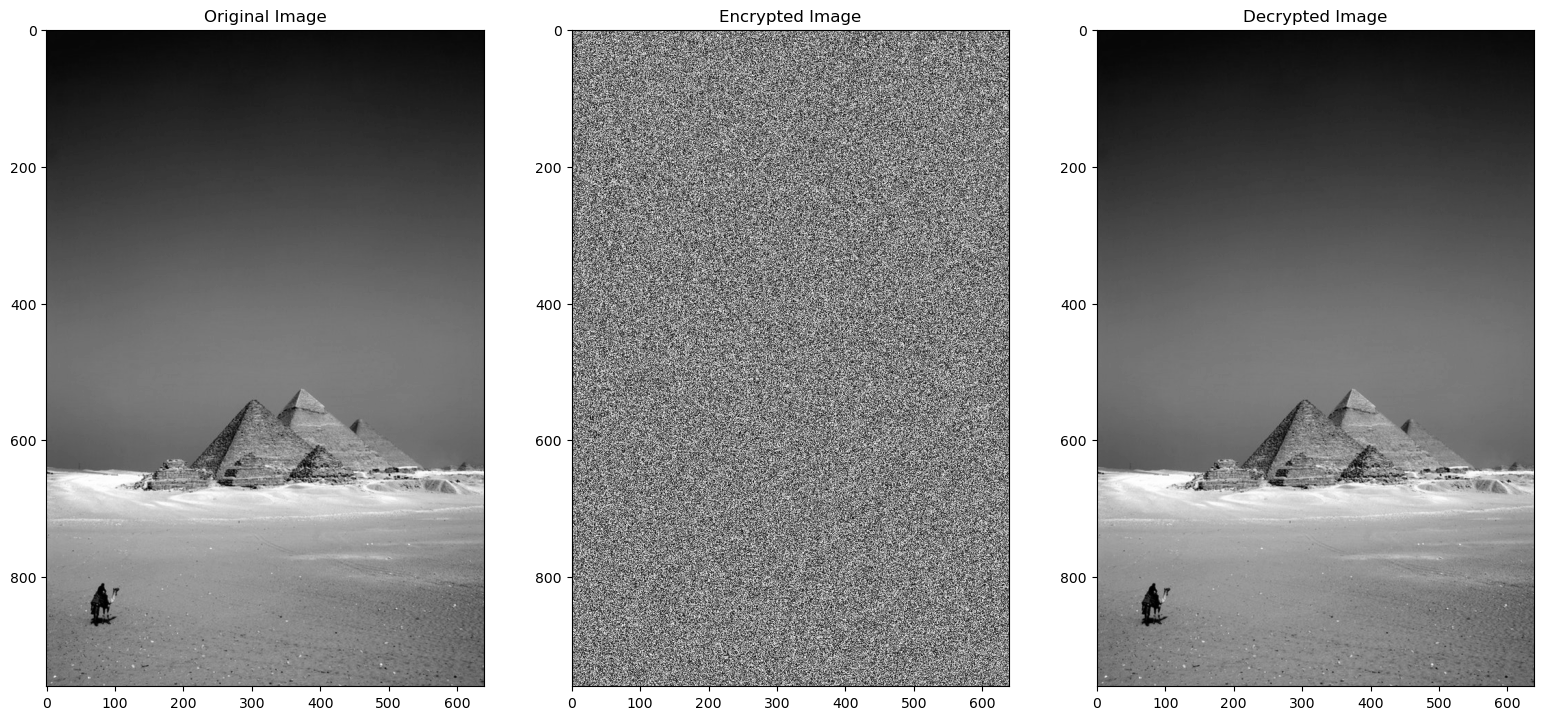

In [8]:
# Display the results
show_images([grayscale_pyramids, encrypted_pyramids, decrypted_pyramids], ["Original Image", "Encrypted Image", "Decrypted Image"])

### As we can see, we can safely encrypt and decrypt images as we wish!